In [1]:
import pickle
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tensorflow as tf
import numpy as np
from matplotlib.patches import Circle
import matplotlib.patches as patches

In [2]:
#Connect to your drive for loading your dictinonary
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#Load your dictionary from your drive
mydict=pickle.load(open("/content/gdrive/My Drive/data_hand_pose.pickle","rb"))

In [4]:
#print your array for shape controlling
print(mydict["image_arr"].shape)
print(mydict["joint_arr"].shape)
print(mydict["bounding_arr"].shape)

(2832, 275, 306, 3)
(2832, 21, 2)
(2832, 4, 1)


In [5]:
#mydict["joint_arr"] is used as label of images.We have to convert from (2832, 21, 2) to (2832,42) 
mydict["joint_arr"] = mydict["joint_arr"].reshape((mydict["joint_arr"].shape[0],mydict["joint_arr"].shape[1]*mydict["joint_arr"].shape[2]))
print(mydict["joint_arr"].shape)

(2832, 42)


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization,MaxPooling2D

In [7]:
#Define model that you want. Careful that we must use (275, 306, 3) as input_shape.Because our all images has this shape
def build_model(batch_normalization, activation):
    model = Sequential()

    model.add(Conv2D(64, 4, activation = activation, padding = 'VALID', input_shape = (275, 306, 3), kernel_initializer = 'glorot_uniform'))
    if batch_normalization: model.add(BatchNormalization())
    model.add(Conv2D(64, 4, activation = activation, padding = 'VALID', kernel_initializer = 'glorot_uniform'))
    if batch_normalization: model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, 4, activation = activation, padding = 'VALID', kernel_initializer = 'glorot_uniform'))
    if batch_normalization: model.add(BatchNormalization())
    model.add(Conv2D(128, 4, activation = activation, padding = 'VALID', kernel_initializer = 'glorot_uniform'))
    if batch_normalization: model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, 4, activation = activation, padding = 'VALID', kernel_initializer = 'glorot_uniform'))
    if batch_normalization: model.add(BatchNormalization())
    model.add(Conv2D(256, 4, activation = activation, padding = 'VALID', kernel_initializer = 'glorot_uniform'))
    if batch_normalization: model.add(BatchNormalization())
    model.add(Conv2D(256, 4, activation = activation, padding = 'VALID', kernel_initializer = 'glorot_uniform'))
    if batch_normalization: model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(512, 4, activation = activation, padding = 'VALID', kernel_initializer = 'glorot_uniform'))
    if batch_normalization: model.add(BatchNormalization())
    model.add(Conv2D(512, 4, activation = activation, padding = 'VALID', kernel_initializer = 'glorot_uniform'))
    if batch_normalization: model.add(BatchNormalization())
    model.add(Conv2D(512, 4, activation = activation, padding = 'VALID', kernel_initializer = 'glorot_uniform'))
    if batch_normalization: model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation = activation))
    model.add(Dense(42, activation = activation))
    return model

In [8]:
#Build and compile model
model = build_model(batch_normalization = True, activation = 'relu')
model.compile(
    optimizer =keras.optimizers.Adam(lr=0.0001),
    loss = 'mse',
)



In [9]:
#Use 'summary' for checking number of parameter 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 272, 303, 64)      3136      
_________________________________________________________________
batch_normalization (BatchNo (None, 272, 303, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 269, 300, 64)      65600     
_________________________________________________________________
batch_normalization_1 (Batch (None, 269, 300, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 134, 150, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 131, 147, 128)     131200    
_________________________________________________________________
batch_normalization_2 (Batch (None, 131, 147, 128)     5

In [10]:
#Set number of test,train and validation data
train_joint_arr=mydict["joint_arr"][:2200]
validation_joint_arr=mydict["joint_arr"][2200:2420]
test_joint_arr=mydict["joint_arr"][2420:]

train_image_arr=mydict["image_arr"][:2200]
validation_image_arr=mydict["image_arr"][2200:2420]
test_image_arr=mydict["image_arr"][2420:]



In [11]:
#Fit model
model.fit(train_image_arr,train_joint_arr,
          epochs=100,batch_size=32,verbose=1,validation_data=(validation_image_arr,validation_joint_arr))

Epoch 1/100
69/69 [==============================] - 97s 1s/step - loss: 3835.4255 - val_loss: 10400.1240
Epoch 2/100
69/69 [==============================] - 93s 1s/step - loss: 1927.0369 - val_loss: 6572.5425
Epoch 3/100
69/69 [==============================] - 93s 1s/step - loss: 1588.6740 - val_loss: 3537.7607
Epoch 4/100
69/69 [==============================] - 93s 1s/step - loss: 1308.1068 - val_loss: 2113.2646
Epoch 5/100
69/69 [==============================] - 93s 1s/step - loss: 1267.0321 - val_loss: 1785.9259
Epoch 6/100
69/69 [==============================] - 93s 1s/step - loss: 1236.5201 - val_loss: 1569.1886
Epoch 7/100
69/69 [==============================] - 93s 1s/step - loss: 1211.0134 - val_loss: 1510.6776
Epoch 8/100
69/69 [==============================] - 93s 1s/step - loss: 1196.8706 - val_loss: 1472.2992
Epoch 9/100
69/69 [==============================] - 93s 1s/step - loss: 1185.9366 - val_loss: 1448.5107
Epoch 10/100
69/69 [==============================] - 

KeyboardInterrupt: ignored

In [ ]:
model.save('/content/gdrive/My Drive/mymodel_v_2.h5')

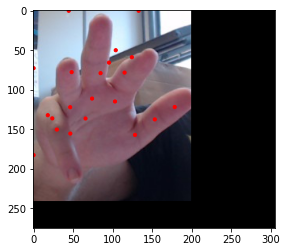

In [31]:
#Take any one images in test dataset for checking model success. Do not hesitate to change test image
preds = model.predict(test_image_arr[15:16])

fig, ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(test_image_arr[15])

for xx, yy in preds[0].reshape((21,2)):
    circ = Circle((xx,yy),2,color='red')
    ax.add_patch(circ)

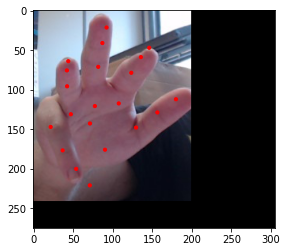

In [32]:
#Display ground truth of prediction image
fig, ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(test_image_arr[15])

for xx, yy in test_joint_arr[15].reshape(21,2):
    circ = Circle((xx,yy),2,color='red')
    ax.add_patch(circ)